# Python versus Numpy

### Stijn Oomes
donderdag 3 september 2020

---
 
**Python Data Science Handbook**

Chapter 2. Introduction to NumPy

https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch02.html#introduction-to-numpy

## Importeer libraries

Controleer welke version van Python in dit notebook wordt gerund.

Hint: met ! kun je commandline commando's draaien.

In [30]:
!python3 --version

Python 3.6.9


Importeer Numpy en OpenCV en controleer welke versie worden gerund.

In [31]:
import numpy as np
np.__version__

'1.18.5'

In [32]:
import cv2 as cv 
cv.__version__

'4.1.2'

Ik check ook meteen even de versies van Scikit-Learn, TensorFlow, en Keras. Deze libraries gaan we volgende week gebruiken.

In [33]:
import sklearn as sk
sk.__version__

'0.22.2.post1'

In [34]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [35]:
import keras
keras.__version__

'2.4.3'

## Definieer een parameter

Definieer een parameter n en geef het voorlopig even een relatief kleine waarde, bijvoorbeeld 4.

We beginnen de test met een datastructuur met weinig elementen. Daarna mag je die waarde zo groot maken als je computer aan kan.

In [36]:
n = 4

## Meet hoeveel geheugen wordt gebruikt

Hoe kunnen we zien hoeveel geheugen een datastructuur inneemt?

Definieer een lijst in Python met `n` elementen met een random waarde.

Hint: `import random`

In [37]:
import random

random_list = []

for i in range (n):
  new = random.random()
  random_list.append(new)

print(random_list)

[0.1274259306440717, 0.7033863860931299, 0.010534942516164603, 0.5374365080388082]



Kijk daarna hoeveel bytes deze lijst in het geheugen inneemt.

Hint: `import sys`

In [38]:
import sys

sys.getsizeof(random_list)

96

Kijk ook hoeveel één element van deze lijst in het geheugen inneemt.

In [39]:
sys.getsizeof(random_list[0])

24

Experimenteer eens met de grootte van andere datatypes. 

Hoeveel geheugen neemt een Boolean in? Verbaast je dat?

In [40]:
true_bytes = True
sys.getsizeof(true_bytes)


28

In [41]:
false_bytes = False
sys.getsizeof(false_bytes)

# De false boolean is 4 bytes minder, dat verbaaste me inderdaad wel.

24

## Meet hoe lang een berekening duurt

Hoe lang duurt het om bijvoorbeeld alle getallen in onze lijst op te tellen?

In [42]:
sum(random_list)

1.3787837672921743

Meet de starttijd, voer de sommatie uit, meet de eindtijd. Bepaal het verschil tusen eindtijd en begintijd. 

In welke eenheid wordt de tijd gemeten?


Hint: `import time`

In [49]:
import time 

start = time.time()
sum(random_list)
end = time.time()

print(f"It takes {end-start} nanoseconds to count the sum of the list.")

It takes 2.574920654296875e-05 nanoseconds to count the sum of the list.


## Python list

Maak twee Python lists van lengte n. Vermenigvuldig die twee lists elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de Python list in neemt.

Meet ook hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [44]:
%%timeit

python_list =[random.randrange(255) for i in range(n*n)]
python_list2 = [a*b for a,b in zip(python_list, python_list)]

sum(python_list2)

100000 loops, best of 3: 12.1 µs per loop


## NumPy array

Maak twee NumPy arrays van lengte n. Vermenigvuldig de twee arrays elementsgewijs. Tel vervolgens alle getallen bij elkaar op.

Bepaal hoeveel bytes de NumPy array in neemt.

Meet hoe lang deze berekeningen duren. Let op je parameter n is nu nog klein.

In [45]:
%%timeit
array = np.random.randint(255, size=(n,n))
array2= array*array
array2.sum()

The slowest run took 19.15 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 15.6 µs per loop


## Vergelijking Python list versus NumPy array

Kijk nu voor verschillende waardes van de parameter n hoe lang de berekeningen duren.

Bereken voor elke n de tijd voor de Python berekening gedeeld door de NumPy bereking.

Kies als verschillende n waardes bijvoorbeeld 4, 8, 16, 32, 64, 128, 256, 1024.

Een grafiek zou hier heel handig zijn!

In [53]:
import matplotlib.pyplot as plt 
n = [4, 8, 16, 32, 64, 128, 256, 1024, 2048]
max = n[len(n)-1]+1
y1 = []
y2 = []
for array in range(1, 2+1):
    for x in n:
        if array == 1: # Create the python lists
            a = random.sample(range(1, max), x)
            b = random.sample(range(1, max), x)
        else: # Create the numpy arrays
            a = np.array(random.sample(range(1, max), x))
            b = np.array(random.sample(range(1, max), x))
            
        # Calculate the total time it takes to sum all elements    
        startTime = time.time()
        ab = [a * b for a,b in zip(a,b)]
        total = sum(ab)
        endTime = time.time()
        elapsed_time = endTime - startTime
        if array == 1:
            y1.append(elapsed_time)
        else:
            y2.append(elapsed_time)

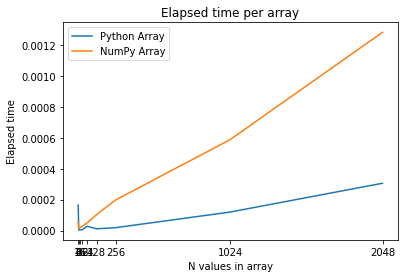

In [54]:
plt.plot(n,y1, label="Python Array")
plt.plot(n,y2, label="NumPy Array")
plt.xlabel('N values in array')
plt.ylabel('Elapsed time')
plt.title('Elapsed time per array')
plt.xticks(n)
plt.legend()
plt.show()